In [149]:
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [151]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [152]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [153]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [154]:
customers.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [155]:
products.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [156]:
transactions.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [157]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


# **Business Insights**

## Insight 1: Top revenue generating products

In [158]:
transactions_with_names = transactions.merge(products, on='ProductID', how='left')
transactions_with_names['ProductID']

,ProductID
0,P067
1,P067
2,P067
3,P067
4,P067
...,...
995,P037
996,P037
997,P037
998,P037


In [159]:
product_revenue = transactions_with_names.groupby(['ProductName'])['TotalValue'].sum()
#f = products.groupby(['ProductID'])['Price'].sum()
#f["P029"]
product_revenue

,TotalValue
ProductName,
ActiveWear Biography,3047.40
ActiveWear Cookbook,6112.92
ActiveWear Cookware Set,18083.73
ActiveWear Headphones,13958.34
ActiveWear Jacket,22712.56
...,...
TechPro Running Shoes,8124.76
TechPro Smartwatch,13778.88
TechPro T-Shirt,14264.14


Top 5 Revenue-Generating Products:
 ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


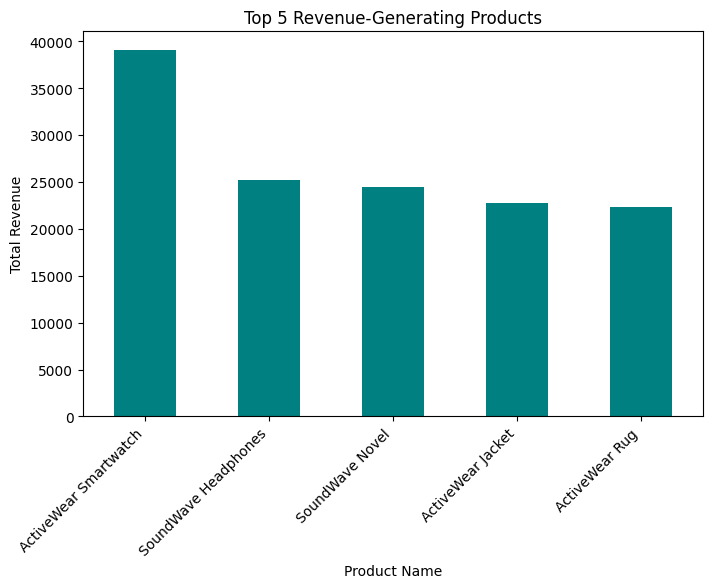

In [160]:
top_revenue_products = product_revenue.sort_values(ascending=False).head(5)
print("Top 5 Revenue-Generating Products:\n", top_revenue_products)

plt.figure(figsize=(8, 5))
top_revenue_products.plot(kind='bar', color='teal')
plt.title('Top 5 Revenue-Generating Products')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

## Insight 2: Time based sales trends

In [161]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [162]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [163]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
daily_sales = transactions.groupby(transactions['TransactionDate'].dt.date)['TotalValue'].sum()
daily_sales#[0] #['TransactionDate']# == ["2023-12-30"]

,TotalValue
TransactionDate,
2023-12-30,313.92
2023-12-31,3455.60
2024-01-01,1468.94
2024-01-02,1818.03
2024-01-03,2224.41
...,...
2024-12-24,2589.58
2024-12-25,1343.90
2024-12-26,5108.25


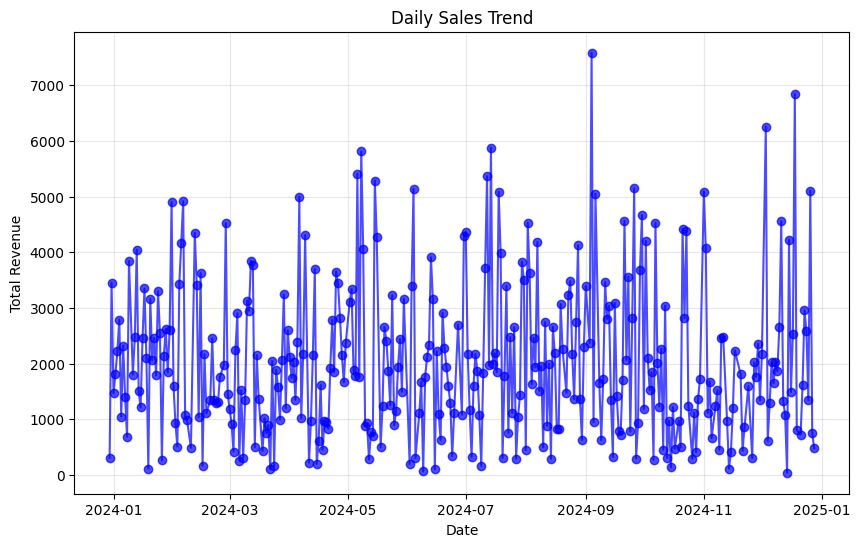

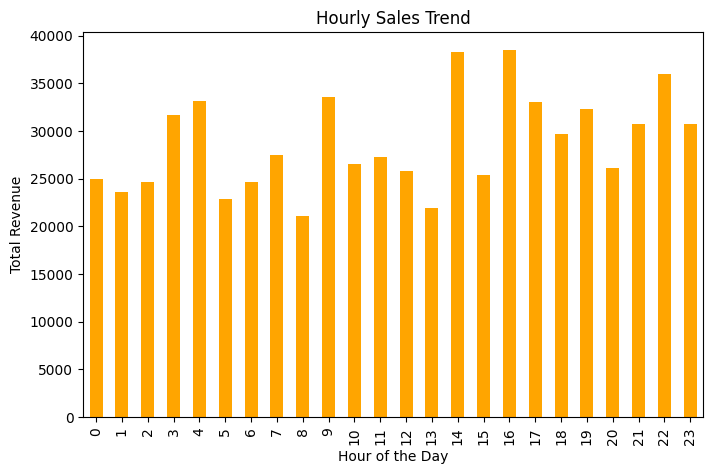

In [164]:
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='line', color='blue', marker='o', linestyle='-', alpha=0.7)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(alpha=0.3)
plt.show()

transactions['Hour'] = transactions['TransactionDate'].dt.hour
hourly_sales = transactions.groupby('Hour')['TotalValue'].sum()

plt.figure(figsize=(8, 5))
hourly_sales.plot(kind='bar', color='orange')
plt.title('Hourly Sales Trend')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue')
plt.show()

## Insight 3: Price Sensitivity Analysis

In [165]:
transactions_with_name = transactions.merge(transactions, on='ProductID', how='left')
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [166]:
transactions_2 = transactions.merge(products, on='ProductID', how='left')
transactions_2

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,Hour,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,12,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,22,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,7,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,22,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,8,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,2,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,13,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,10,SoundWave Smartwatch,Electronics,459.86


In [167]:
price_quantity = transactions_2.groupby(['ProductID', 'ProductName'])[['Price_x', 'Quantity']].sum()
price_quantity = price_quantity.reset_index()
price_quantity

,ProductID,ProductName,Price_x,Quantity
0,P001,ActiveWear Biography,1354.40,18
1,P002,ActiveWear Smartwatch,2770.40,25
2,P003,ComfortLiving Biography,529.44,31
3,P004,BookWorld Rug,669.83,18
4,P005,TechPro T-Shirt,3434.48,24
...,...,...,...,...
95,P096,SoundWave Headphones,4612.05,34
96,P097,BookWorld Cookbook,2874.06,25
97,P098,SoundWave Laptop,2099.51,16
98,P099,SoundWave Mystery Book,1417.16,11


In [168]:
import numpy as np
price_quantity['Price Elasticity'] = price_quantity['Quantity'] / price_quantity['Price_x']

sensitive_products = price_quantity.sort_values('Price Elasticity', ascending=False).head(10)
sensitive_products

,ProductID,ProductName,Price_x,Quantity,Price Elasticity
43,P044,ActiveWear Running Shoes,75.28,13,0.172689
55,P056,SoundWave Smartwatch,128.64,21,0.163246
13,P014,ActiveWear Jacket,105.04,14,0.133283
72,P073,ComfortLiving Laptop,269.90,24,0.088922
34,P035,ActiveWear T-Shirt,305.90,26,0.084995
62,P063,TechPro Novel,302.31,25,0.082697
77,P078,HomeSense Rug,411.80,26,0.063137
2,P003,ComfortLiving Biography,529.44,31,0.058552
69,P070,HomeSense T-Shirt,292.14,15,0.051345
53,P054,SoundWave Cookbook,916.80,46,0.050175


Top 10 Price-Sensitive Products:
     Price_x  Quantity  Price Elasticity
43    75.28        13          0.172689
55   128.64        21          0.163246
13   105.04        14          0.133283
72   269.90        24          0.088922
34   305.90        26          0.084995
62   302.31        25          0.082697
77   411.80        26          0.063137
2    529.44        31          0.058552
69   292.14        15          0.051345
53   916.80        46          0.050175


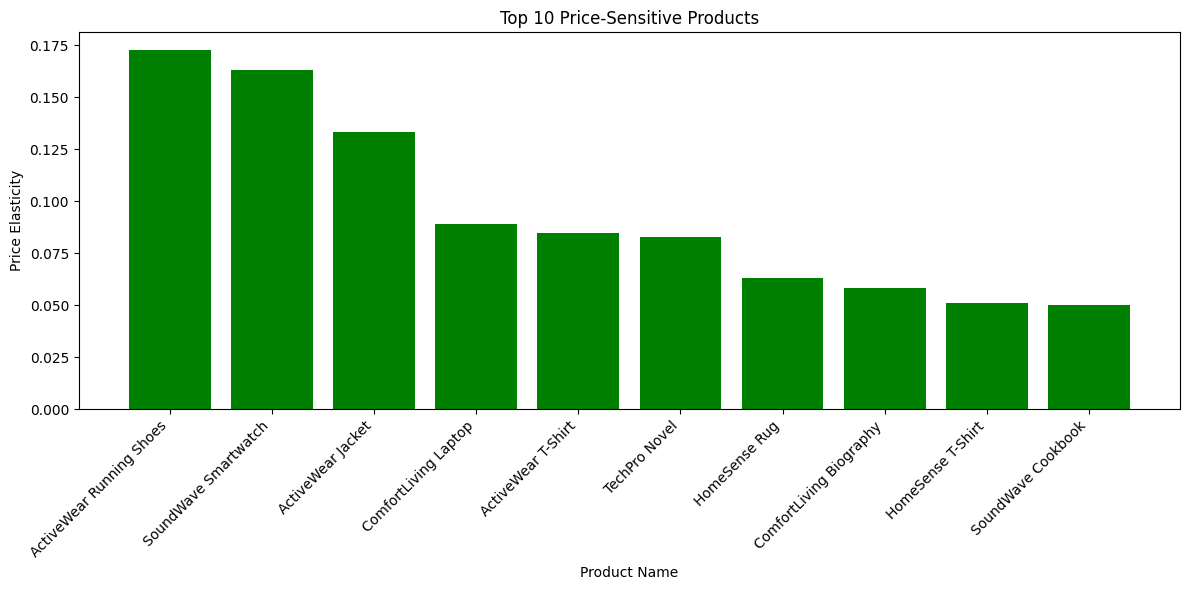

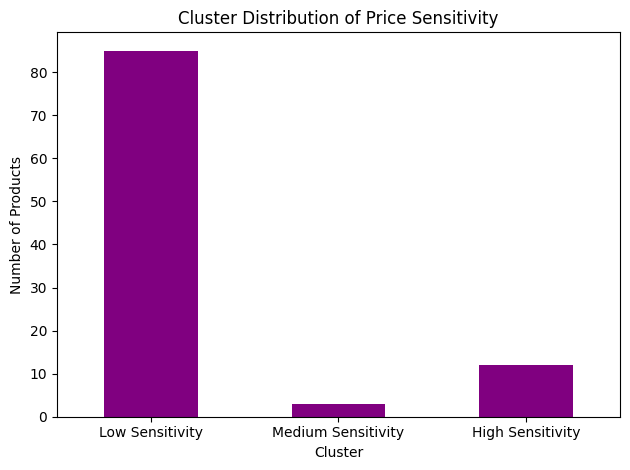

In [169]:
print("Top 10 Price-Sensitive Products:\n", sensitive_products[['Price_x', 'Quantity', 'Price Elasticity']])

plt.figure(figsize=(12, 6))
plt.bar(sensitive_products['ProductName'], sensitive_products['Price Elasticity'], color='green')
plt.title('Top 10 Price-Sensitive Products')
plt.xlabel('Product Name')
plt.ylabel('Price Elasticity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

from sklearn.cluster import KMeans

price_quantity['Log Elasticity'] = np.log1p(price_quantity['Price Elasticity'])
kmeans = KMeans(n_clusters=3, random_state=42)
price_quantity['Cluster'] = kmeans.fit_predict(price_quantity[['Log Elasticity']])

cluster_counts = price_quantity['Cluster'].value_counts().sort_index()
cluster_counts.plot(kind='bar', color='purple')
plt.title('Cluster Distribution of Price Sensitivity')
plt.xlabel('Cluster')
plt.ylabel('Number of Products')
plt.xticks(ticks=range(3), labels=['Low Sensitivity', 'Medium Sensitivity', 'High Sensitivity'], rotation=0)
plt.tight_layout()
plt.show()

## Insight 4: Region Based Sales Patterns

In [170]:
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Hour,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,12,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,22,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,7,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,22,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,15,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,8,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,2,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,13,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,10,Joshua Hamilton,Asia,2024-11-11


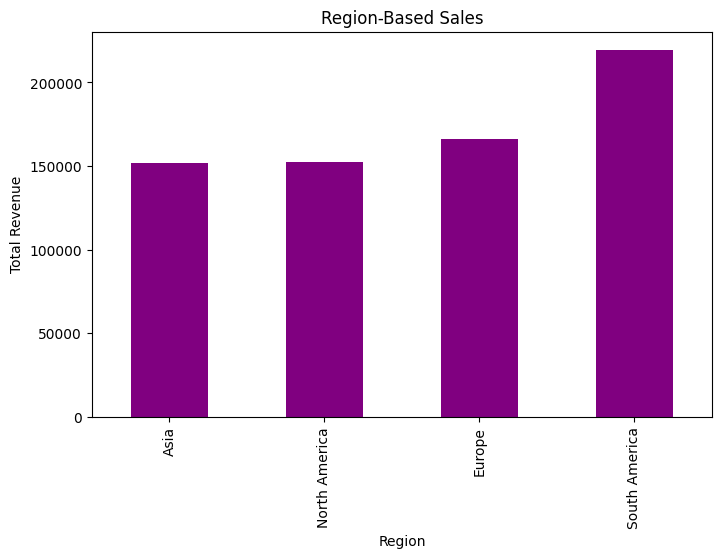

In [171]:
region_sales = merged_data.groupby('Region')['TotalValue'].sum()

plt.figure(figsize=(8, 5))
region_sales.sort_values().plot(kind='bar', color='purple')
plt.title('Region-Based Sales')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

## Insight 5: Seasonal Trends & Event-Based Opportunities

In [172]:
customer_data = transactions.merge(customers, on='CustomerID', how='left')
customer_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Hour,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,12,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,22,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,7,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,22,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,15,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,8,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,2,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,13,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,10,Joshua Hamilton,Asia,2024-11-11


In [173]:
customer_revenue = customer_data.groupby('CustomerName')['TotalValue'].sum()
customer_revenue

,TotalValue
CustomerName,
Aaron Cox,1717.55
Abigail Jones,5487.25
Aimee Taylor,7572.91
Albert Burke,5316.46
Alexander Barker,3347.60
...,...
Wayne Stone,5771.27
Wendy Browning,3716.52
William Adams,7634.45


In [174]:
purchase_frequency = customer_data.groupby('CustomerName')['TransactionID'].count()
purchase_frequency

,TransactionID
CustomerName,
Aaron Cox,4
Abigail Jones,11
Aimee Taylor,7
Albert Burke,6
Alexander Barker,6
...,...
Wayne Stone,8
Wendy Browning,4
William Adams,11


In [175]:
avg_purchase_value = customer_revenue / purchase_frequency
avg_purchase_value

,0
CustomerName,
Aaron Cox,429.387500
Abigail Jones,498.840909
Aimee Taylor,1081.844286
Albert Burke,886.076667
Alexander Barker,557.933333
...,...
Wayne Stone,721.408750
Wendy Browning,929.130000
William Adams,694.040909


In [176]:
returning_customers = customer_data.groupby('CustomerName')['TransactionID'].nunique()
retention_rate = (returning_customers > 1).sum() / len(returning_customers)
returning_customers

,TransactionID
CustomerName,
Aaron Cox,4
Abigail Jones,11
Aimee Taylor,7
Albert Burke,6
Alexander Barker,6
...,...
Wayne Stone,8
Wendy Browning,4
William Adams,11


In [177]:
avg_customer_lifespan = 5
customer_clv = avg_purchase_value * purchase_frequency * avg_customer_lifespan

customer_analysis = pd.DataFrame({
    'TotalRevenue': customer_revenue,
    'PurchaseFrequency': purchase_frequency,
    'AvgPurchaseValue': avg_purchase_value,
    'CLV': customer_clv
})
customer_analysis

,TotalRevenue,PurchaseFrequency,AvgPurchaseValue,CLV
CustomerName,,,,
Aaron Cox,1717.55,4,429.387500,8587.75
Abigail Jones,5487.25,11,498.840909,27436.25
Aimee Taylor,7572.91,7,1081.844286,37864.55
Albert Burke,5316.46,6,886.076667,26582.30
Alexander Barker,3347.60,6,557.933333,16738.00
...,...,...,...,...
Wayne Stone,5771.27,8,721.408750,28856.35
Wendy Browning,3716.52,4,929.130000,18582.60
William Adams,7634.45,11,694.040909,38172.25


Top 10 Customers by CLV:
                       TotalRevenue  PurchaseFrequency  AvgPurchaseValue  \
CustomerName                                                              
Paul Parsons              10673.87                 10       1067.387000   
Bruce Rhodes               8040.39                  8       1005.048750   
Gerald Hines               7663.70                 10        766.370000   
William Adams              7634.45                 11        694.040909   
Aimee Taylor               7572.91                  7       1081.844286   
Anna Ball                  7111.32                  8        888.915000   
Mrs. Kimberly Wright       7073.28                  8        884.160000   
Jennifer Pena              6819.57                  8        852.446250   
Rodney Eaton               6715.72                  8        839.465000   
Juan Mcdaniel              6708.10                  9        745.344444   

                           CLV  
CustomerName                    
Paul Pa

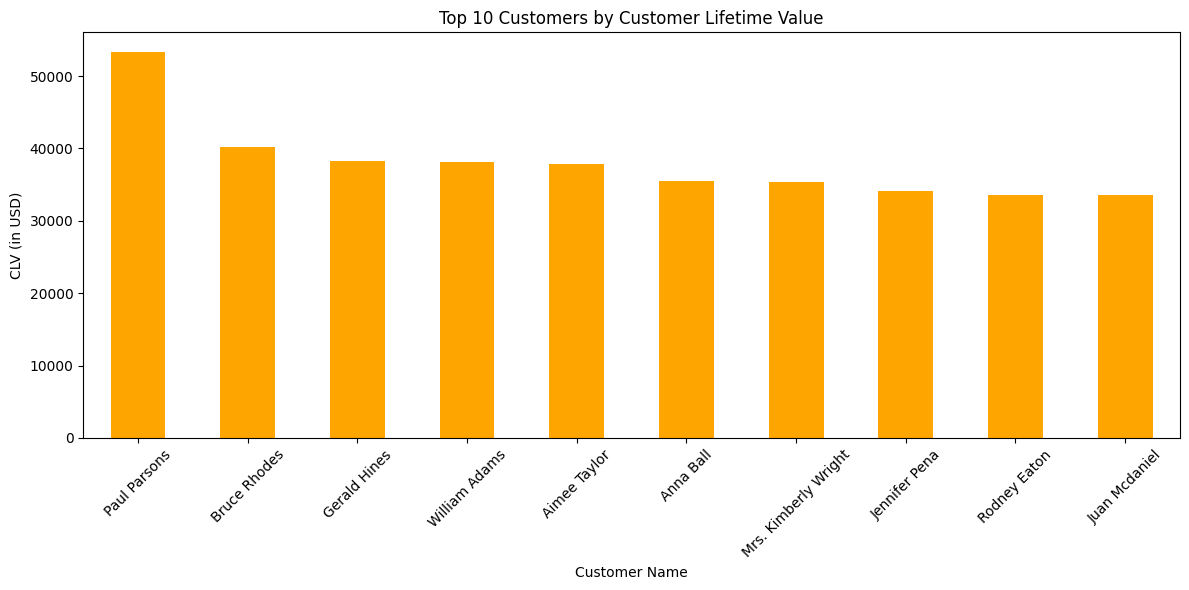

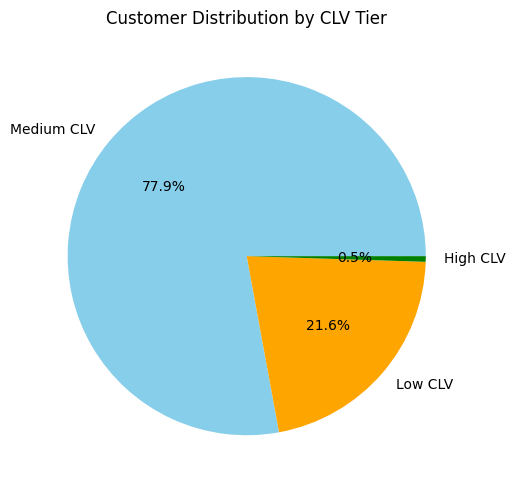

In [178]:
top_customers = customer_analysis.sort_values('CLV', ascending=False).head(10)

print("Top 10 Customers by CLV:\n", top_customers)

plt.figure(figsize=(12, 6))
top_customers['CLV'].plot(kind='bar', color='orange')
plt.title('Top 10 Customers by Customer Lifetime Value')
plt.xlabel('Customer Name')
plt.ylabel('CLV (in USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

def clv_tier(clv):
    if clv <= 10000:
        return 'Low CLV'
    elif clv <= 50000:
        return 'Medium CLV'
    else:
        return 'High CLV'

customer_analysis['CLV Tier'] = customer_analysis['CLV'].apply(clv_tier)

clv_tier_distribution = customer_analysis['CLV Tier'].value_counts()

plt.figure(figsize=(8, 5))
clv_tier_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'])
plt.title('Customer Distribution by CLV Tier')
plt.ylabel('')
plt.tight_layout()
plt.show()
